In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Общий анализ
Всего 2060 фотографий. Каждая из них сегментирована на участки. Фотографии в ДФ сегментированы на участки с разными типами пород и с разными типами разрушенности.
Файл data.csv содержит информацию о каждом сегменте.

In [4]:
data = pd.read_csv('data_for_study/data.csv')
data.tail(30)

task_id  photo_id photo_type  segment_num  \
14885  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            5   
14886  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            6   
14887  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            7   
14888  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            8   
14889  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            9   
14890  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           10   
14891  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           11   
14892  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           12   
14893  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           13   
14894  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            0   
14895  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            1   
14896  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            2   
14897  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            3   
14898  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            4   
14899  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            5   
14900  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            6   
14901  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            7   
14902  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            8   
14903  dc6aecf5_acaa_4ae3_9489_718c83db85fb   1002852         ДС            9   
14904  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            0   
14905  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            1   
14906  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            2   
14907  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            3   
14908  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            4   
14909  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            5   
14910  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            6   
14911  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            7   
14912  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            8   
14913  de63ac27_e98e_459a_9672_b07415228a50   1009408         ДС            9   
14914  f5e57301_6ffc_4f3b_8c8f_b311478b58c3   1004015         УФ            0   

        segment_type        segment_value  
14885  Разрушенность               Разлом  
14886  Разрушенность               Разлом  
14887  Разрушенность               Разлом  
14888         Порода             Аргиллит  
14889         Порода             Аргиллит  
14890  Разрушенность               Разлом  
14891         Порода  Переслаивание пород  
14892  Разрушенность               Разлом  
14893  Разрушенность               Разлом  
14894         Порода  Переслаивание пород  
14895  Разрушенность               Разлом  
14896  Разрушенность               Разлом  
14897         Порода  Переслаивание пород  
14898  Разрушенность               Разлом  
14899  Разрушенность               Разлом  
14900  Разрушенность               Разлом  
14901  Разрушенность               Разлом  
14902  Разрушенность               Разлом  
14903  Разрушенность               Разлом  
14904  Разрушенность               Разлом  
14905         Порода  Переслаивание пород  
14906  Разрушенность               Разлом  
14907         Порода  Алевролит глинистый  
14908  Разрушенность               Разлом  
14909         Порода  Алевролит глинистый  
14910  Разрушенность               Разлом  
14911  Разрушенность               Разлом  
14912  Разрушенность               Разлом  
14913  Разрушенность               Разлом  
14914       Свечение          Карбонатное

* task_id - используется для сопоставления сегментированных участков (matrixes) и описаний экспертов(extra)  
* photo_id - каждая фотография разбита на определенные участки, каждый из которых характеризуется чем-либо (см. "Типы признаков сегментированных участков")
* segment_type - это как раз ЗНАЧЕНИЕ ПРИЗНАКА на определенном сегменте. Каждый сегмент каждого изображения помечен номером(segment_num)

### Типы признаков сегментированных участков

In [57]:
segment_type = data['segment_type'].unique()
segment_type = segment_type.tolist()
segment_type

['Свечение', 'Разрушенность', 'Порода']

Как было сказано ранее, фотографии в ДФ сегментируются на **типы пород** и **типы разрушенности**. Фотографии в УФ сегментируются на различные типы **насыщенности** (см. примеры ниже)

#### Типы пород

In [58]:
species = data[data['segment_type']=='Порода']['segment_value'].unique()
species = species.tolist()
species

['Аргиллит',
 'Переслаивание пород',
 'Алевролит глинистый',
 'Песчаник',
 'Глинисто-кремнистая порода',
 'Песчаник глинистый',
 'Уголь',
 'Аргиллит углистый',
 'Алевролит',
 'Карбонатная порода',
 'Известняк',
 'Глина аргиллитоподобная']

#### Типы свечения

In [59]:
glows = data[data['segment_type']=='Свечение']['segment_value'].unique()
glows = glows.tolist()
glows

['Насыщенное', 'Отсутствует', 'Карбонатное']

#### Типы разрушенности

In [60]:
destructions = data[data['segment_type']=='Разрушенность']['segment_value'].unique()
destructions = destructions.tolist()
destructions

['Разлом', 'Проба']

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   task_id        14915 non-null  object
 1   photo_id       14915 non-null  int64 
 2   photo_type     14915 non-null  object
 3   segment_num    14915 non-null  int64 
 4   segment_type   14915 non-null  object
 5   segment_value  14915 non-null  object
dtypes: int64(2), object(4)
memory usage: 699.3+ KB


Пустых ячеек в данных нет

### Количество записей (примеров) для каждого признака

In [62]:
count_of_types = data[['segment_value','photo_id']].groupby('segment_value').count().rename(columns={'photo_id':'Количество примеров'})

samples_for_destructions = count_of_types.loc[destructions].rename({'segment_value':'Типы разрушенности'})
samples_for_destructions.index.names=['Типы разрушенности']

samples_for_glows = count_of_types.loc[glows].rename({'segment_value':'Типы насыщенности'})
samples_for_glows.index.names=['Типы насыщенности']

samples_for_species = count_of_types.loc[species]
samples_for_species.index.names=['Типы пород']

In [63]:
display(samples_for_species)
display(samples_for_destructions)
display(samples_for_glows)

Количество примеров
Типы пород                                     
Аргиллит                                    757
Переслаивание пород                        1305
Алевролит глинистый                         301
Песчаник                                    641
Глинисто-кремнистая порода                   16
Песчаник глинистый                           89
Уголь                                        18
Аргиллит углистый                            15
Алевролит                                     9
Карбонатная порода                            5
Известняк                                     1
Глина аргиллитоподобная                       4

Количество примеров
Типы разрушенности                     
Разлом                             9853
Проба                                96

Количество примеров
Типы насыщенности                     
Насыщенное                         799
Отсутствует                        809
Карбонатное                        197

Для некоторых типов очень мало примеров. В частности:  
- большое различие между *разломом* и *пробой* (для типов разрушенности)   
- мало примеров для *известняка*, *глины аргиллитоподобной*, *алевролита*, *карбонатной породы*, *угля* , *аргиллита углистого*, *глинисто-кремнистой породы* (для типов пород) 
- большое различие между *карбонатным* и другими типами насыщенности

## Различные типы признаков на фото

In [64]:
import cv2
def load_and_visualize(photo_id, task_id):
    display(data[data.photo_id == int(photo_id)])
    image = cv2.imread('data_for_study/photos/{}.jpeg'.format(photo_id))
    data_matrix = np.load('data_for_study/matrixes/matrix_{}__{}.npz'.format(photo_id, task_id))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,30))
    axes[0].imshow(image)
    axes[1].imshow(data_matrix['data'])

task_id  photo_id photo_type  segment_num  \
14880  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            0   
14881  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            1   
14882  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            2   
14883  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            3   
14884  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            4   
14885  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            5   
14886  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            6   
14887  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            7   
14888  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            8   
14889  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС            9   
14890  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           10   
14891  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           11   
14892  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           12   
14893  d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2   1003764         ДС           13   

        segment_type        segment_value  
14880         Порода  Переслаивание пород  
14881  Разрушенность               Разлом  
14882  Разрушенность               Разлом  
14883  Разрушенность               Разлом  
14884         Порода  Переслаивание пород  
14885  Разрушенность               Разлом  
14886  Разрушенность               Разлом  
14887  Разрушенность               Разлом  
14888         Порода             Аргиллит  
14889         Порода             Аргиллит  
14890  Разрушенность               Разлом  
14891         Порода  Переслаивание пород  
14892  Разрушенность               Разлом  
14893  Разрушенность               Разлом

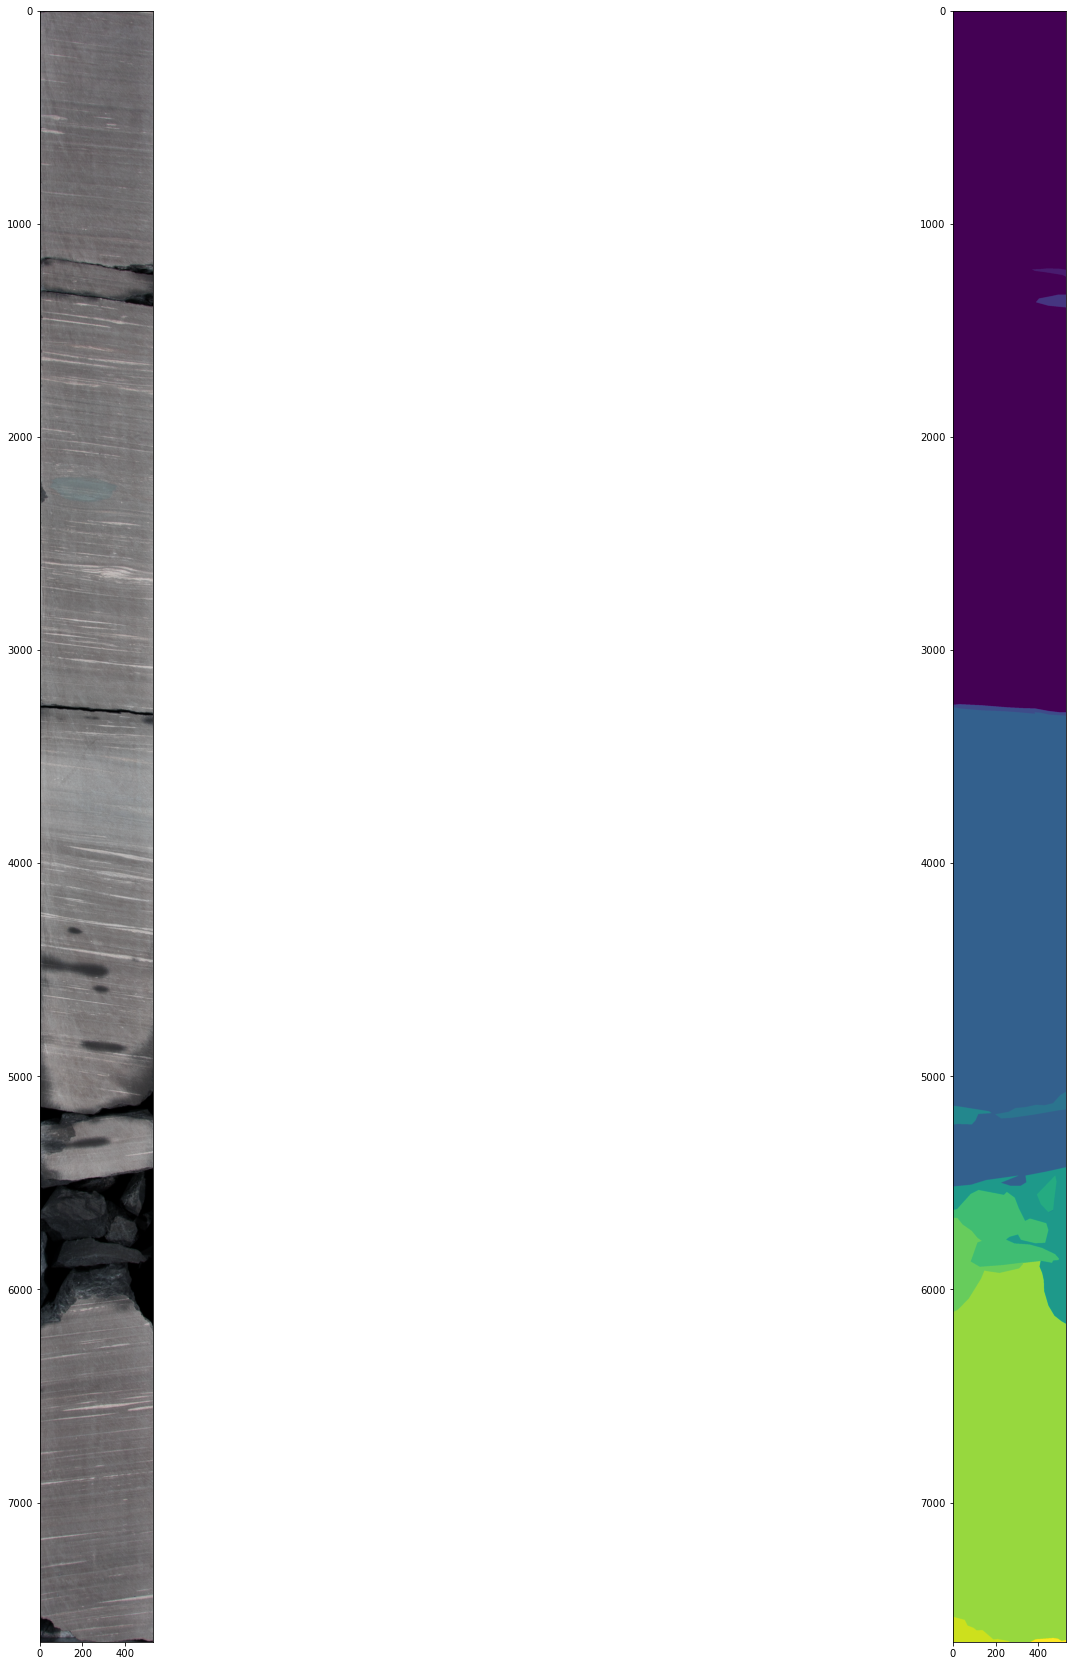

In [65]:
# Переслаивание пород, разлом, аргиллит
load_and_visualize('1003764','d45297a1_99ef_4ebf_a147_3b5f9b4fa8a2')

task_id  photo_id photo_type  segment_num  \
381  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            0   
382  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            1   
383  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            2   
384  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            3   
385  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            4   
386  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            5   
387  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            6   
388  e791b378_f741_42a7_80c0_e15f62a114ae   1010428         ДС            7   

      segment_type        segment_value  
381  Разрушенность               Разлом  
382         Порода             Песчаник  
383  Разрушенность               Разлом  
384         Порода  Переслаивание пород  
385         Порода             Песчаник  
386         Порода  Переслаивание пород  
387  Разрушенность               Разлом  
388         Порода             Песчаник

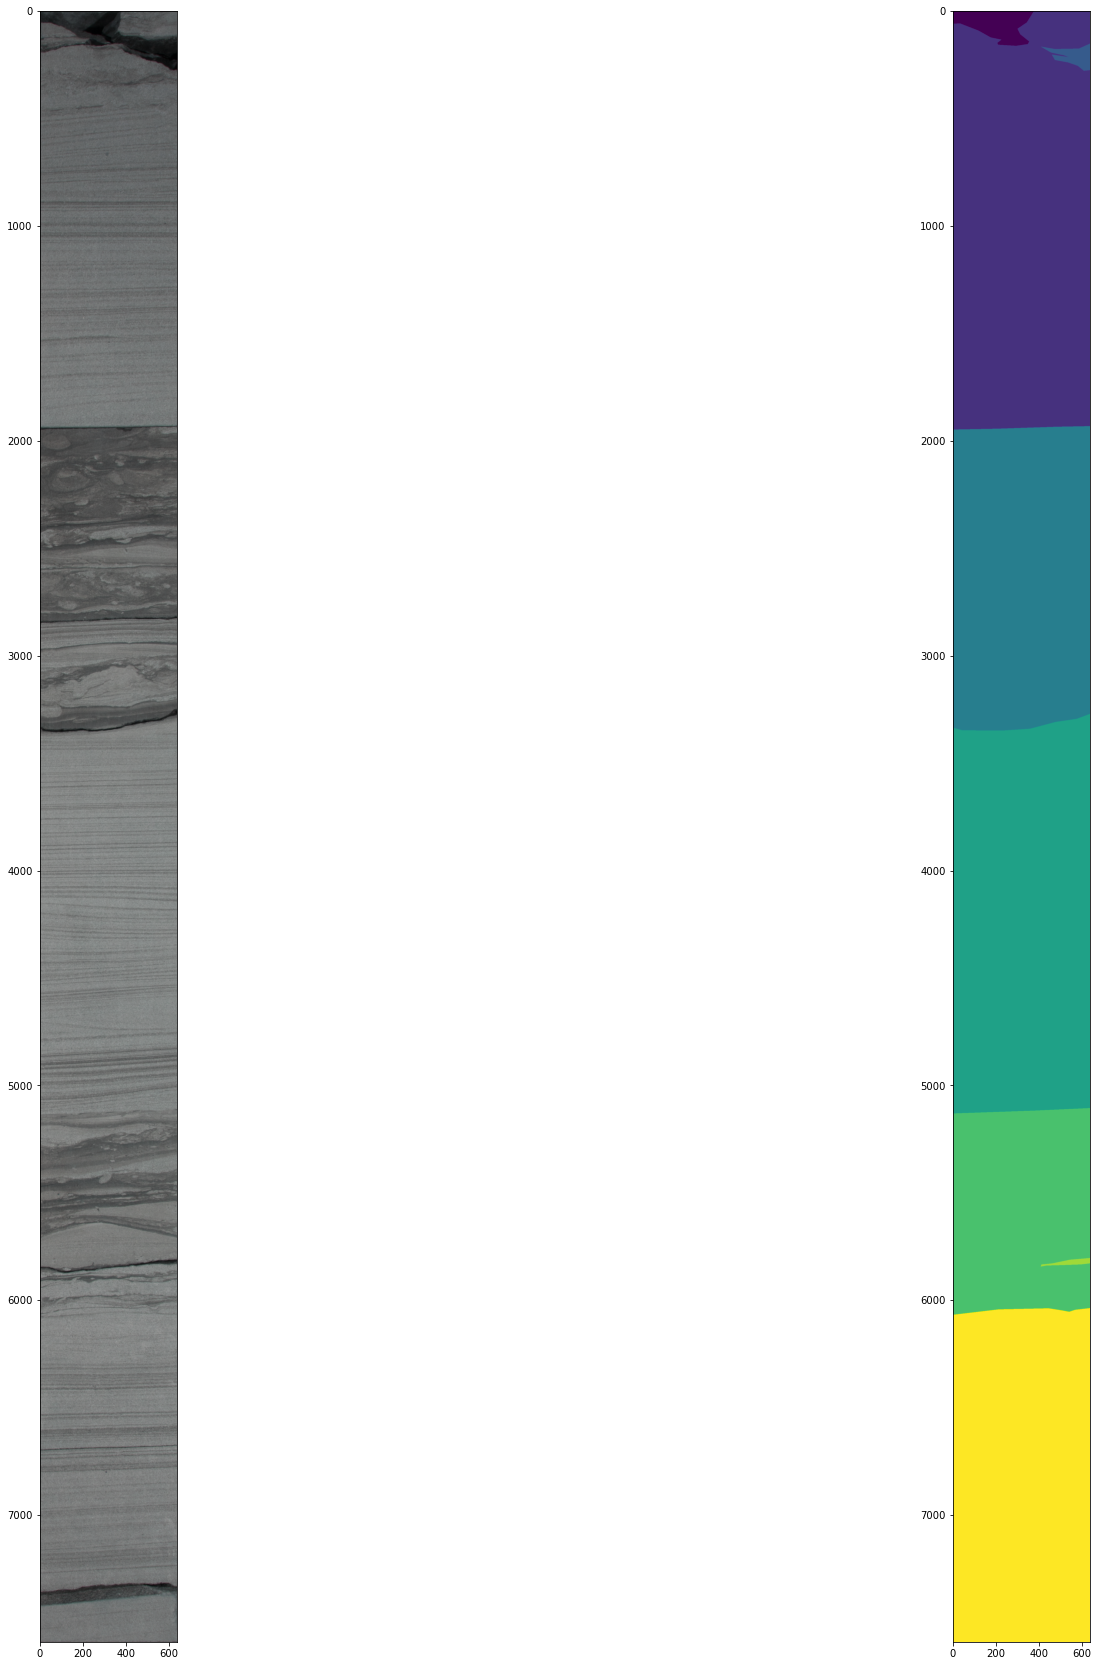

In [66]:
# Песчаник, разлом, переслаивание пород
load_and_visualize('1010428','e791b378_f741_42a7_80c0_e15f62a114ae')

task_id  photo_id photo_type  segment_num  \
1783  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            0   
1784  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            1   
1785  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            2   
1786  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            3   
1787  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            4   
1788  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            5   
1789  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            6   
1790  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            7   
1791  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            8   
1792  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС            9   
1793  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС           10   
1794  dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec   1007270         ДС           11   

       segment_type segment_value  
1783         Порода      Песчаник  
1784  Разрушенность        Разлом  
1785  Разрушенность        Разлом  
1786  Разрушенность        Разлом  
1787  Разрушенность        Разлом  
1788         Порода      Аргиллит  
1789  Разрушенность        Разлом  
1790  Разрушенность        Разлом  
1791         Порода      Аргиллит  
1792  Разрушенность        Разлом  
1793  Разрушенность        Разлом  
1794         Порода         Уголь

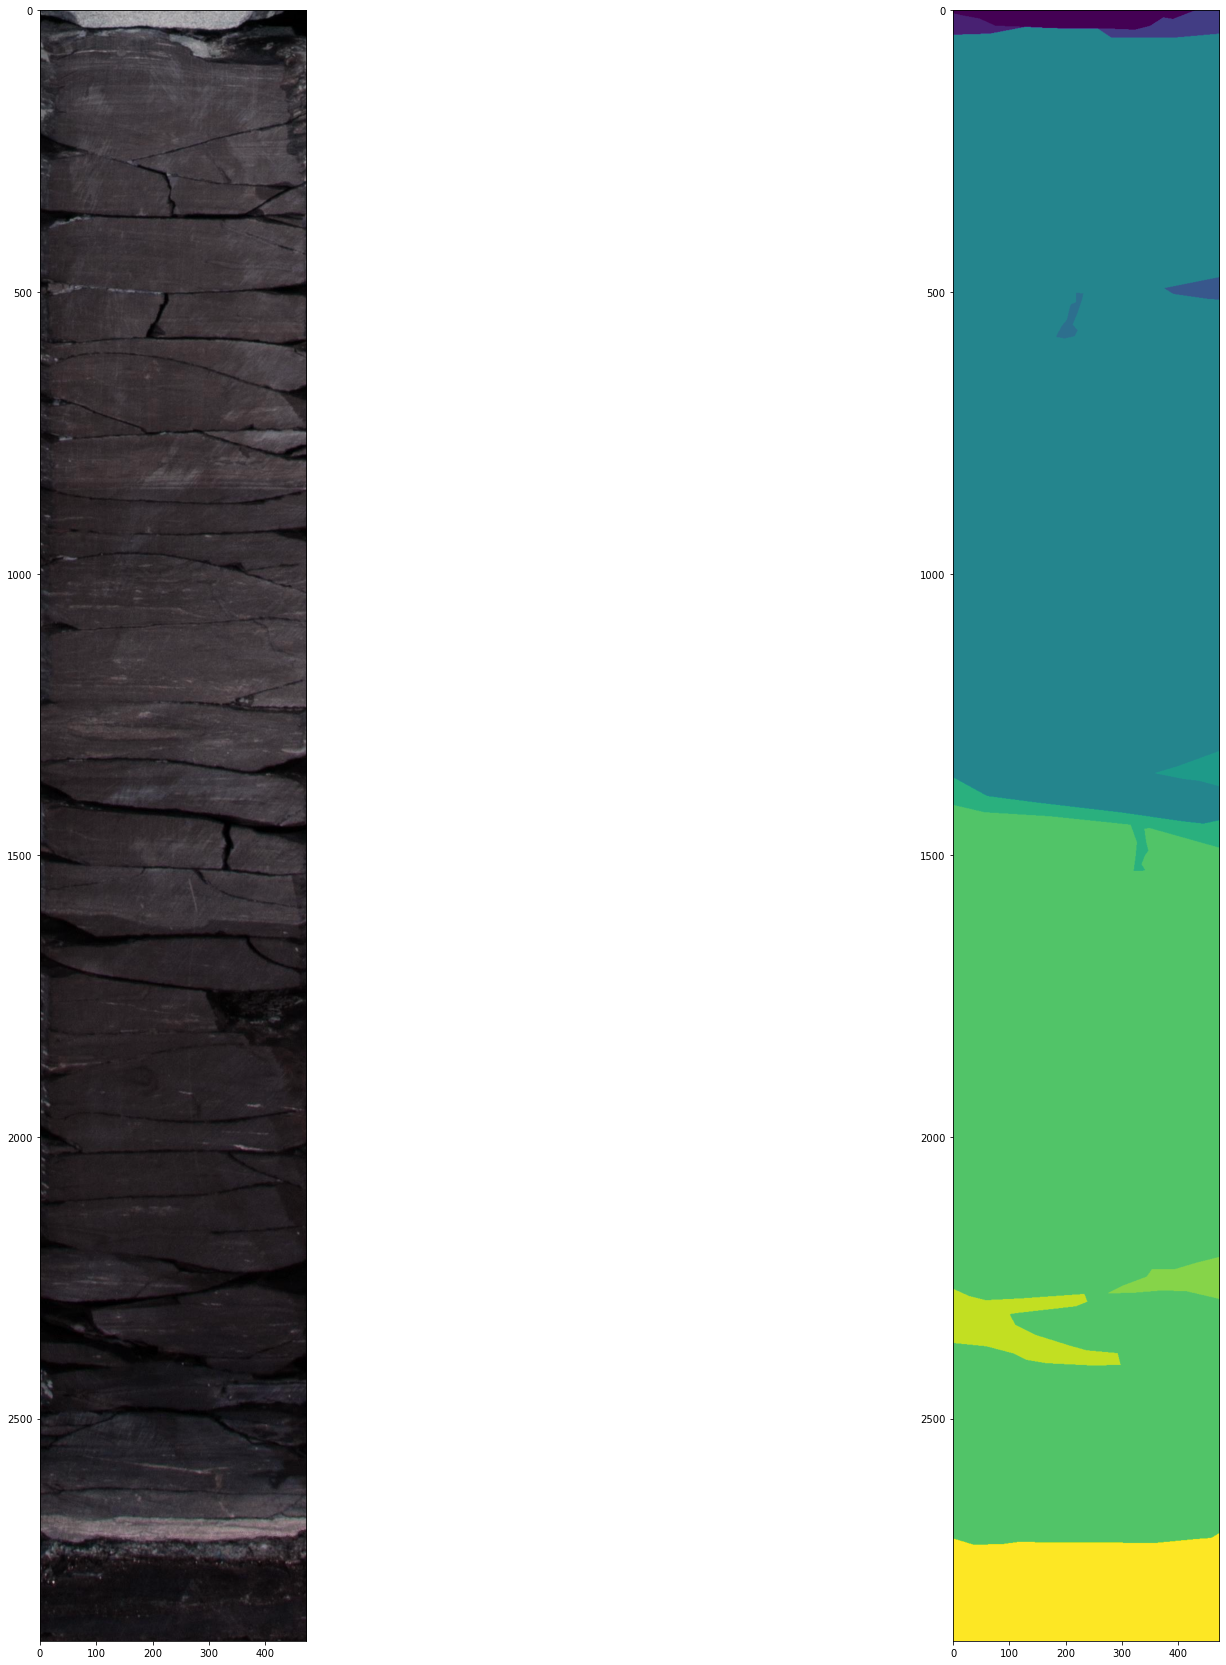

In [67]:
# Уголь, аргиллит, песчаник, разломы
load_and_visualize('1007270', 'dc09dc84_bddd_4f44_bc8f_a5a5ee1834ec')

task_id  photo_id photo_type  segment_num  \
420  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            0   
421  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            1   
422  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            2   
423  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            3   
424  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            4   
425  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            5   
426  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            6   
427  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            7   
428  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            8   
429  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС            9   
430  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС           10   
431  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС           11   
432  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС           12   
433  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС           13   
434  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС           14   
435  cdb57f32_e59d_478d_9f4b_89d86ae36e5f   1014988         ДС           15   

      segment_type        segment_value  
420  Разрушенность               Разлом  
421  Разрушенность               Разлом  
422         Порода  Алевролит глинистый  
423  Разрушенность               Разлом  
424  Разрушенность               Разлом  
425  Разрушенность               Разлом  
426  Разрушенность               Разлом  
427         Порода  Алевролит глинистый  
428  Разрушенность               Разлом  
429  Разрушенность               Разлом  
430  Разрушенность               Разлом  
431  Разрушенность               Разлом  
432  Разрушенность               Разлом  
433         Порода  Переслаивание пород  
434  Разрушенность               Разлом  
435  Разрушенность               Разлом

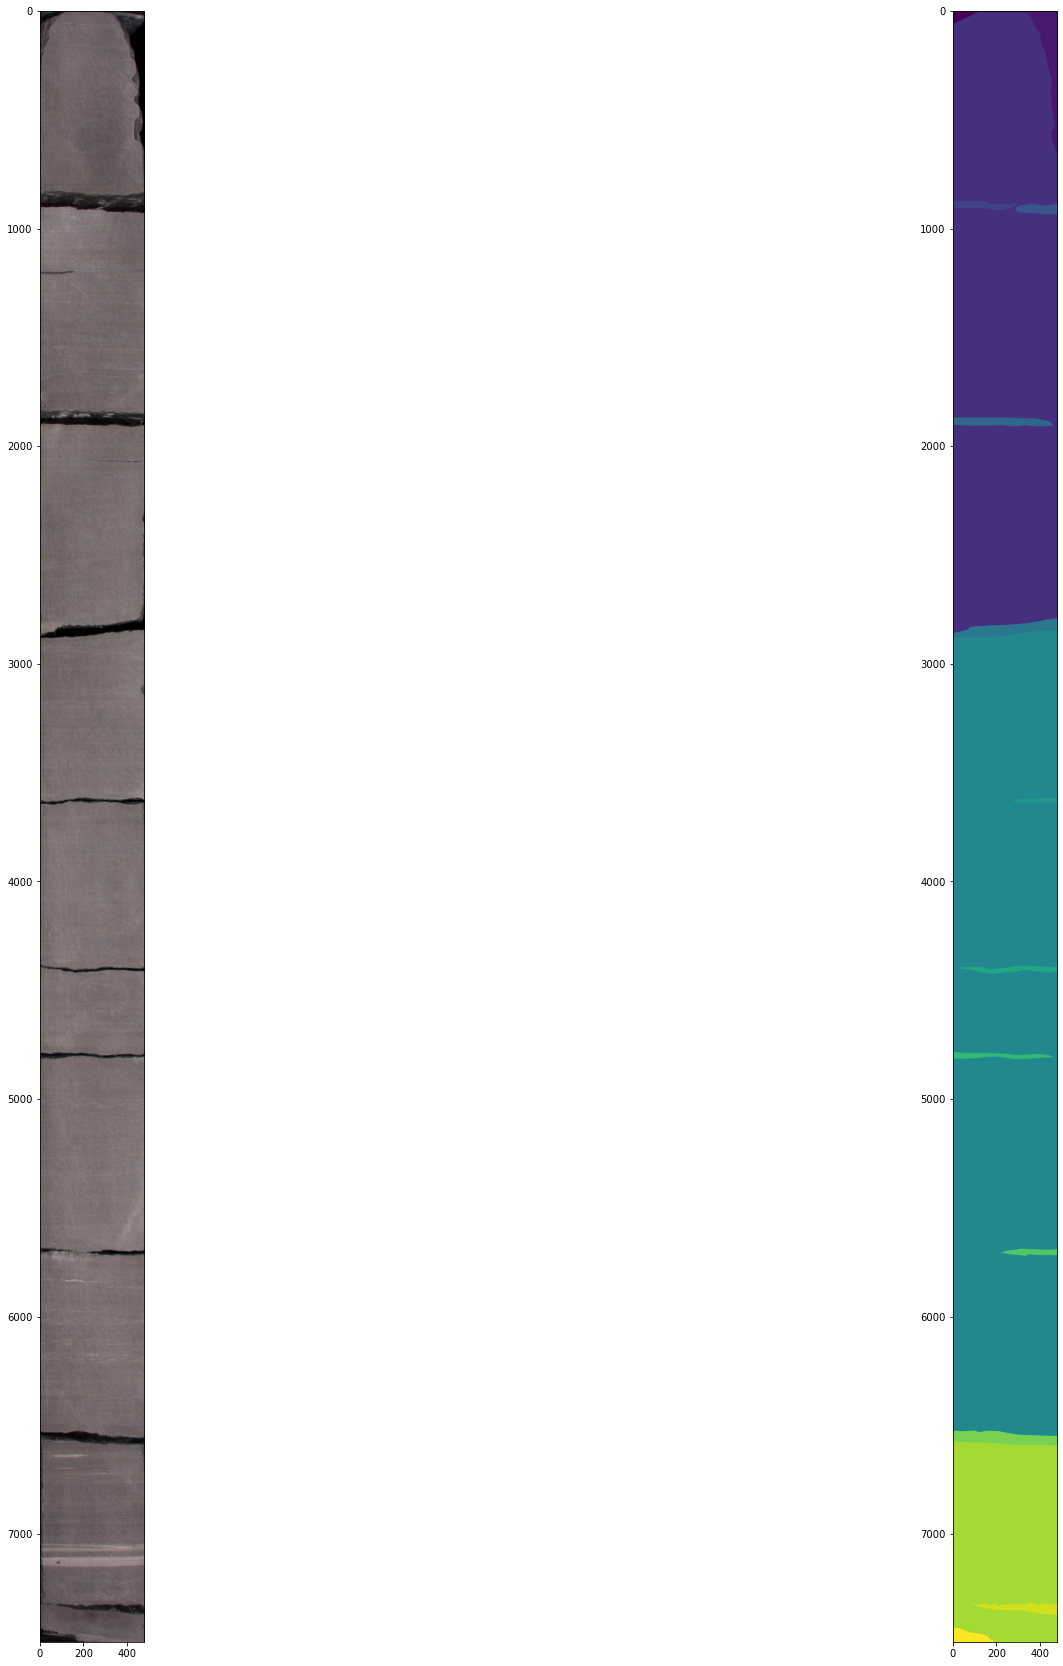

In [68]:
# алевролит глинистый, переслаивание пород, разлом
load_and_visualize('1014988', 'cdb57f32_e59d_478d_9f4b_89d86ae36e5f')

task_id  photo_id photo_type  segment_num  \
14750  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            0   
14751  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            1   
14752  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            2   
14753  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            3   
14754  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            4   
14755  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            5   
14756  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            6   
14757  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            7   
14758  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            8   
14759  ded86e1c_3045_43e5_85ef_b59bb79883ca   1008340         ДС            9   

        segment_type        segment_value  
14750  Разрушенность               Разлом  
14751         Порода   Песчаник глинистый  
14752  Разрушенность               Разлом  
14753  Разрушенность               Разлом  
14754         Порода  Переслаивание пород  
14755  Разрушенность               Разлом  
14756  Разрушенность               Разлом  
14757         Порода   Песчаник глинистый  
14758         Порода  Переслаивание пород  
14759  Разрушенность               Разлом

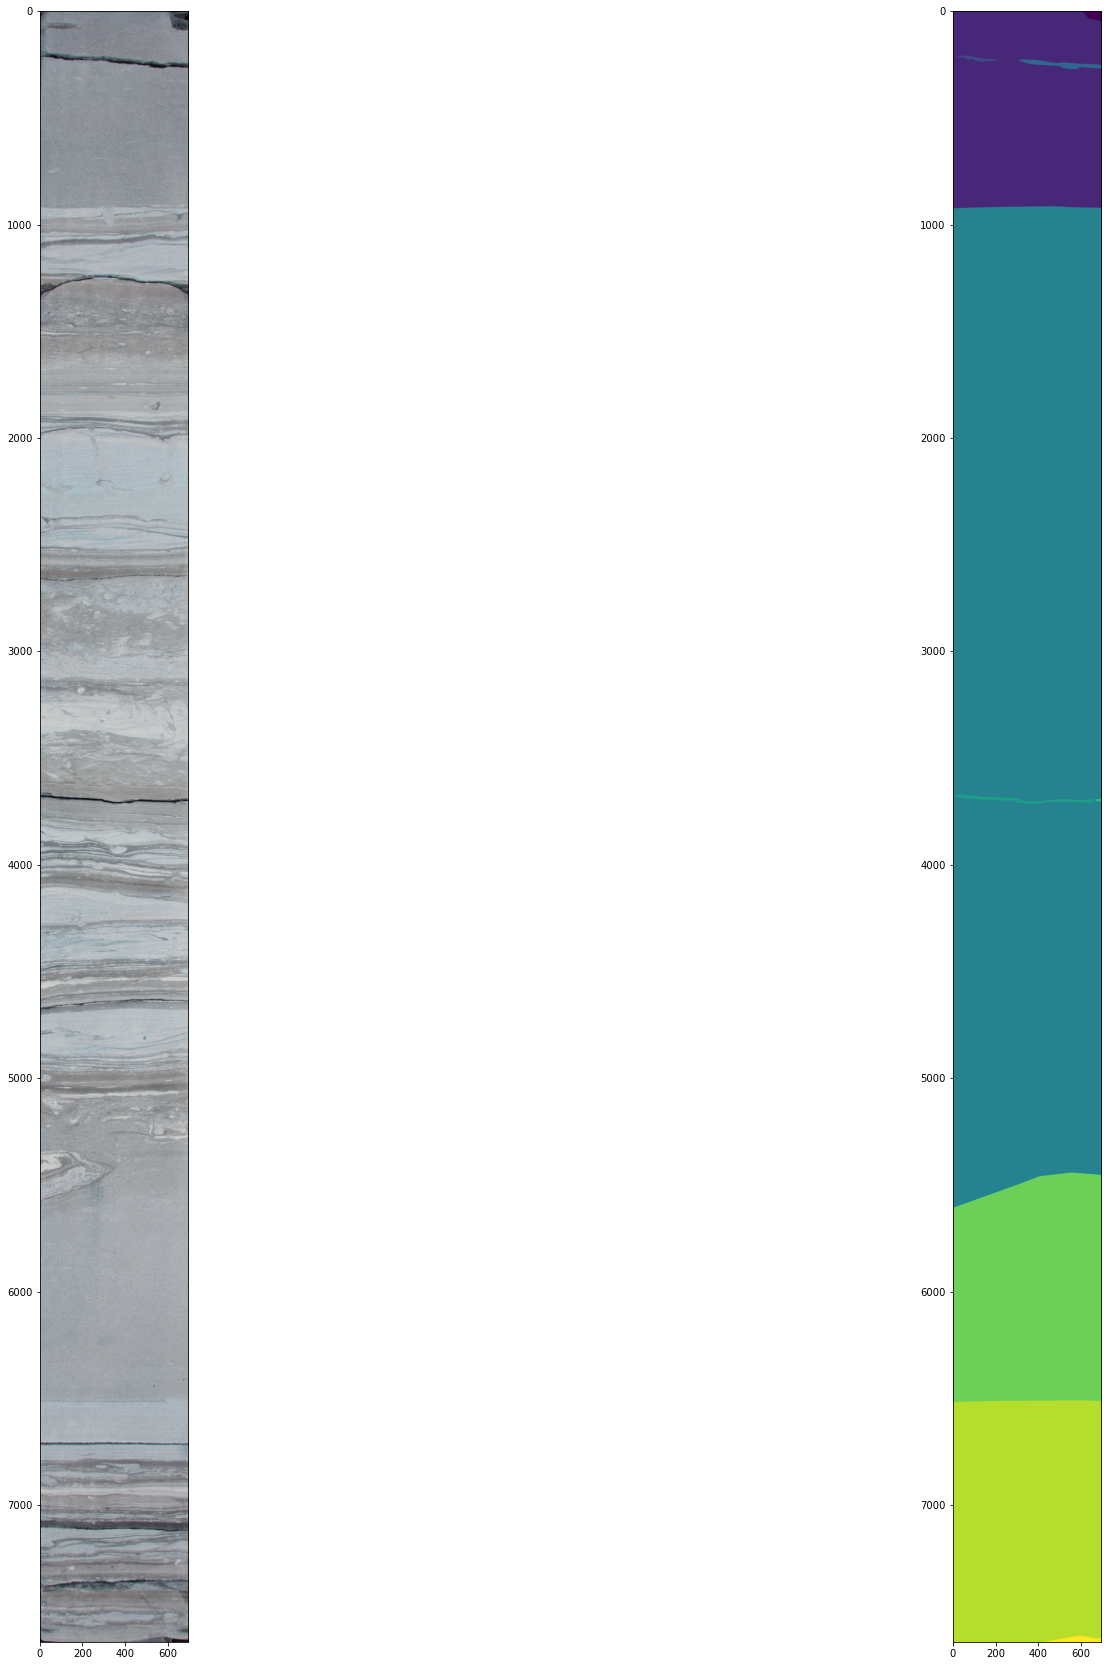

In [69]:
# Песчаник глинистый, переслаивание пород, разлом
load_and_visualize('1008340', 'ded86e1c_3045_43e5_85ef_b59bb79883ca')

task_id  photo_id photo_type  segment_num  \
449  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            0   
450  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            1   
451  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            2   
452  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            3   
453  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            4   
454  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            5   
455  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            6   
456  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            7   
457  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            8   
458  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС            9   
459  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           10   
460  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           11   
461  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           12   
462  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           13   
463  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           14   
464  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           15   
465  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           16   
466  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           17   
467  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           18   
468  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           19   
469  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           20   
470  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           21   
471  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           22   
472  9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e   1015328         ДС           23   

      segment_type        segment_value  
449  Разрушенность               Разлом  
450         Порода  Переслаивание пород  
451  Разрушенность               Разлом  
452  Разрушенность               Разлом  
453  Разрушенность               Разлом  
454         Порода  Алевролит глинистый  
455  Разрушенность               Разлом  
456         Порода  Переслаивание пород  
457  Разрушенность                Проба  
458  Разрушенность               Разлом  
459  Разрушенность               Разлом  
460  Разрушенность               Разлом  
461  Разрушенность               Разлом  
462  Разрушенность                Проба  
463  Разрушенность                Проба  
464  Разрушенность               Разлом  
465         Порода  Алевролит глинистый  
466  Разрушенность               Разлом  
467         Порода  Алевролит глинистый  
468  Разрушенность               Разлом  
469         Порода             Аргиллит  
470  Разрушенность                Проба  
471         Порода  Переслаивание пород  
472  Разрушенность               Разлом

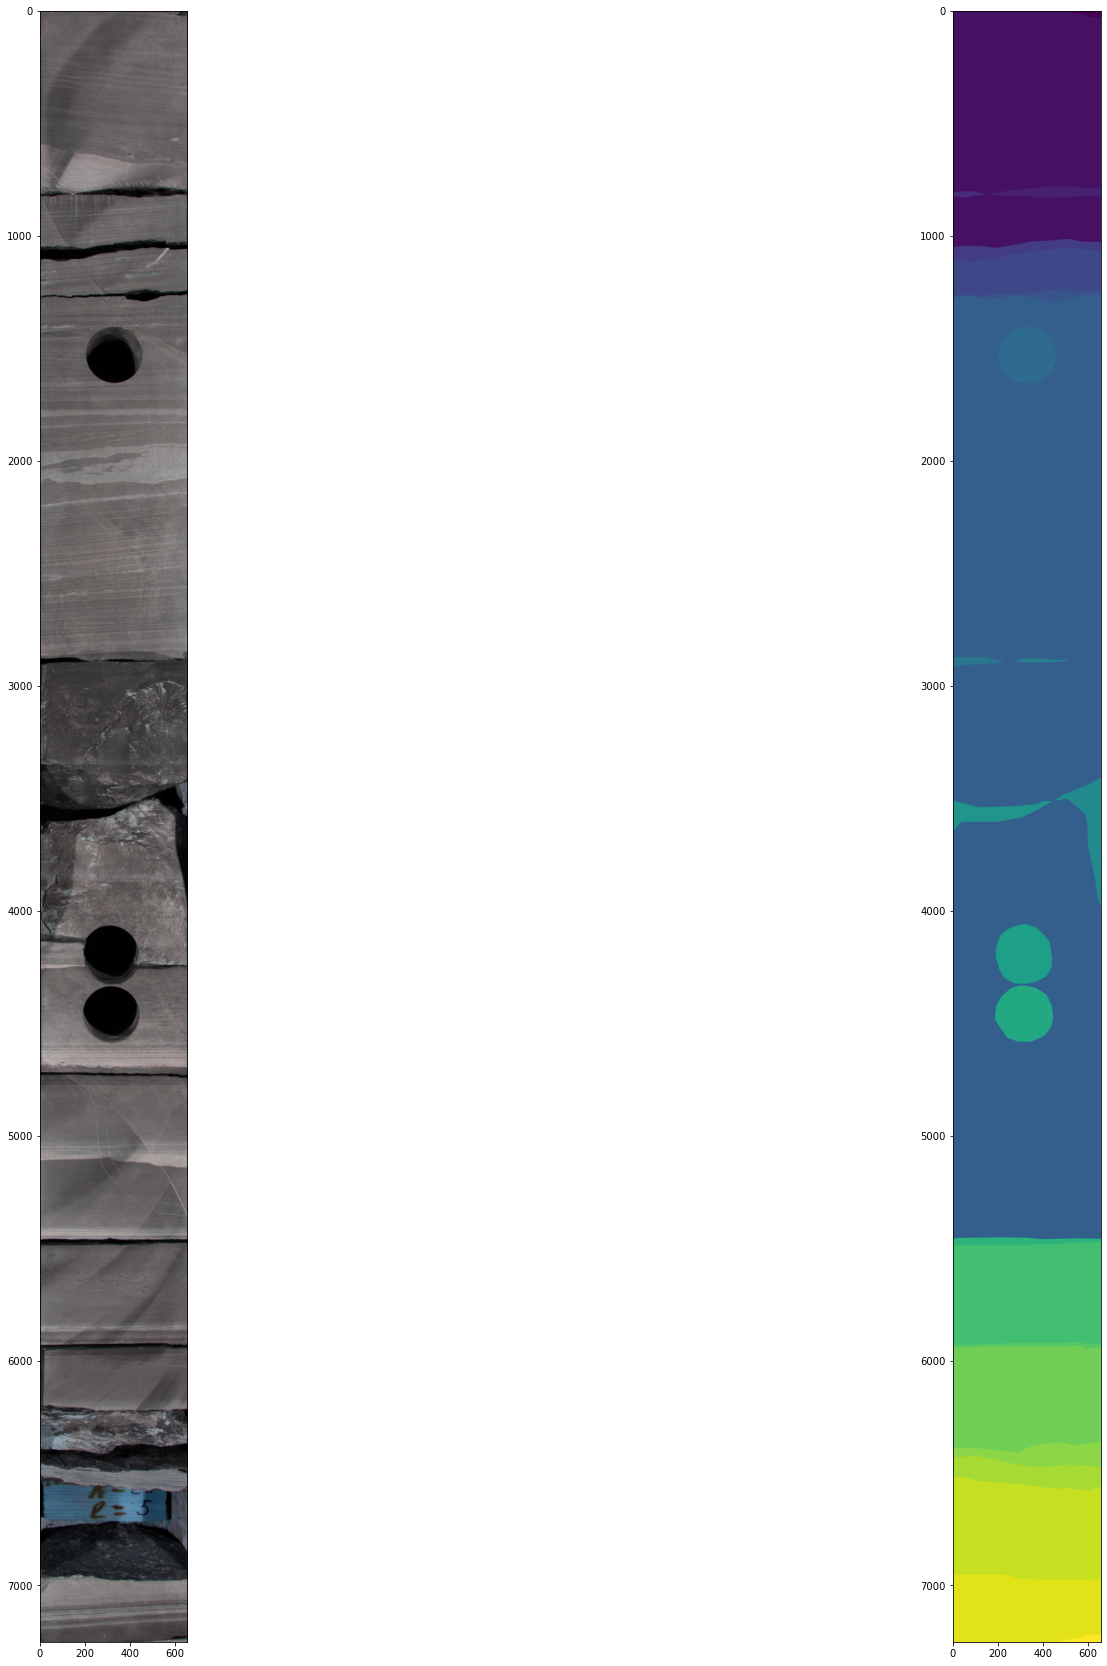

In [70]:
# Проба, разлом, переслаивание пород, алевролит глинистый, аргиллит
load_and_visualize('1015328', '9ef3fea3_fe10_4dcf_8808_10b3ef28ad0e')

task_id  photo_id photo_type  segment_num  \
14218  84dabd5c_fd2a_4558_b4d6_e3b0a261c4a3   1012071         УФ            0   
14219  84dabd5c_fd2a_4558_b4d6_e3b0a261c4a3   1012071         УФ            1   
14220  84dabd5c_fd2a_4558_b4d6_e3b0a261c4a3   1012071         УФ            2   
14221  84dabd5c_fd2a_4558_b4d6_e3b0a261c4a3   1012071         УФ            3   
14222  84dabd5c_fd2a_4558_b4d6_e3b0a261c4a3   1012071         УФ            4   
14223  84dabd5c_fd2a_4558_b4d6_e3b0a261c4a3   1012071         УФ            5   

      segment_type segment_value  
14218     Свечение   Отсутствует  
14219     Свечение   Карбонатное  
14220     Свечение   Карбонатное  
14221     Свечение   Отсутствует  
14222     Свечение   Карбонатное  
14223     Свечение   Отсутствует

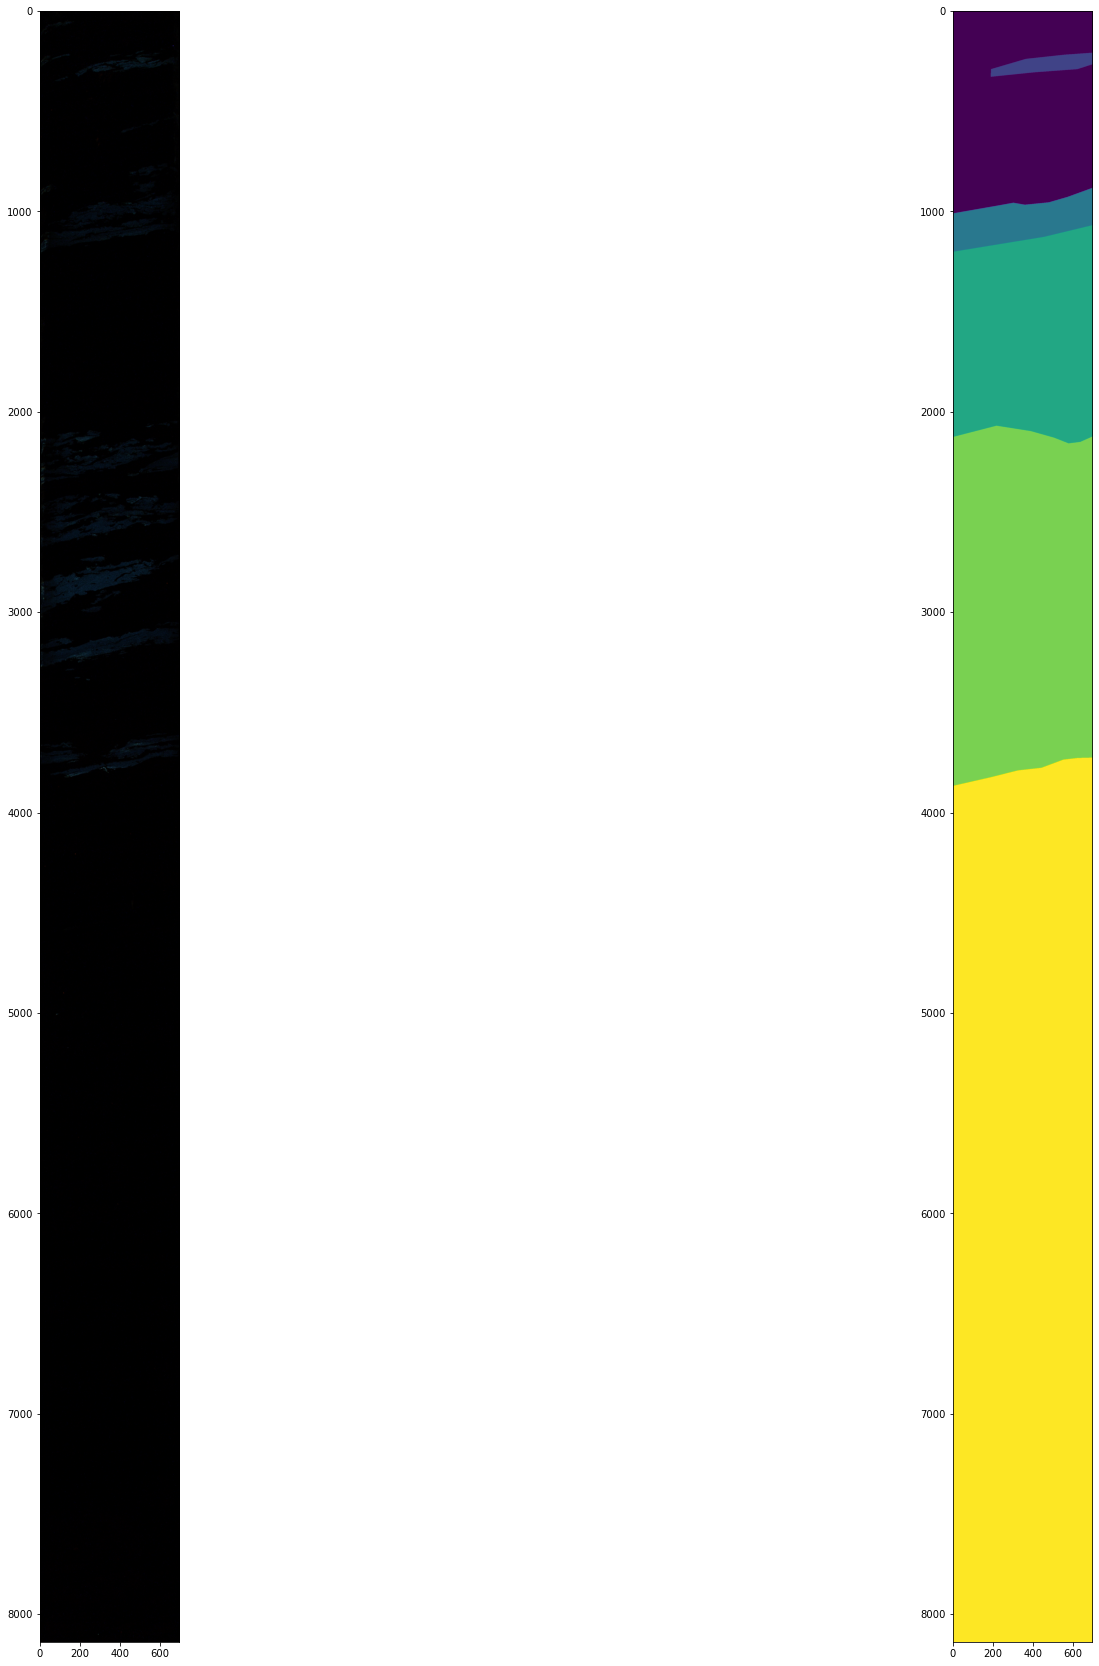

In [71]:
# Карбонатное свечение
load_and_visualize('1012071', '84dabd5c_fd2a_4558_b4d6_e3b0a261c4a3')

task_id  photo_id photo_type  segment_num  \
14768  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            0   
14769  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            1   
14770  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            2   
14771  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            3   
14772  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            4   
14773  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            5   
14774  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            6   
14775  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            7   
14776  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            8   
14777  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ            9   
14778  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ           10   
14779  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ           11   
14780  e278565e_1174_4b2a_8d7e_00a6622ce755   1007705         УФ           12   

      segment_type segment_value  
14768     Свечение   Отсутствует  
14769     Свечение    Насыщенное  
14770     Свечение   Отсутствует  
14771     Свечение    Насыщенное  
14772     Свечение   Отсутствует  
14773     Свечение    Насыщенное  
14774     Свечение   Отсутствует  
14775     Свечение    Насыщенное  
14776     Свечение   Отсутствует  
14777     Свечение    Насыщенное  
14778     Свечение   Отсутствует  
14779     Свечение    Насыщенное  
14780     Свечение   Отсутствует

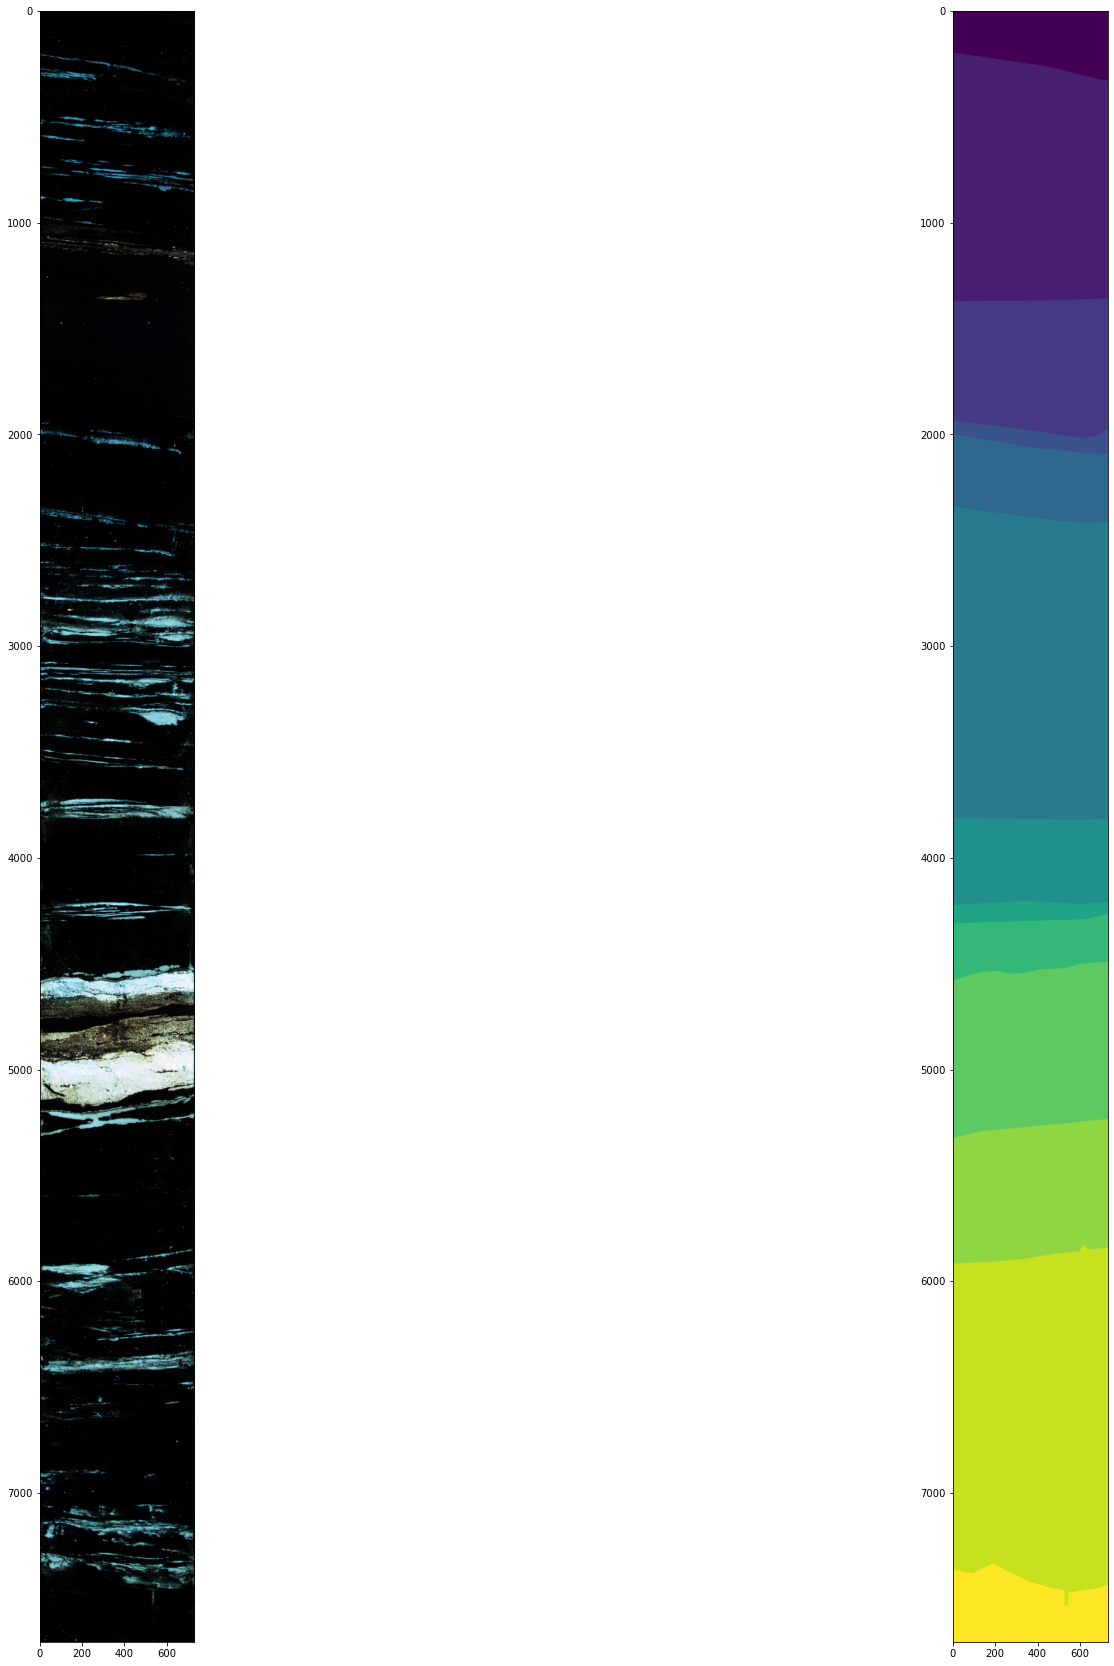

In [73]:
# Насыщенное свечение и отсутствующее
load_and_visualize('1007705', 'e278565e_1174_4b2a_8d7e_00a6622ce755')

## Предобработка (1)

In [7]:
all_photos = data['photo_id'].unique().tolist()
all_tasks = data['task_id'].unique().tolist()

ultraviolet_photos = data[data['photo_type']=='УФ']['photo_id'].unique().tolist()
daylight_photos = data[data['photo_type']=='ДС']['photo_id'].unique().tolist()

# оставим часто встречающиеся породы
delete = data[data['segment_value'] \
                    .isin(['Глинисто-кремнистая порода',
                           'Уголь',
                           'Аргиллит углистый', 'Алевролит',
                           'Карбонатная порода','Известняк',
                           'Глина аргиллитоподобная'])] \
                    ['photo_id'].unique().tolist()

# оставим только часто встречающиеся породы
photo_for_train = list(set(all_photos) - set(delete))
ultra_for_model = ultraviolet_photos
day_for_model = [i for i in daylight_photos if i in photo_for_train]
print(f'размер выборки для фото в УФ: {len(ultra_for_model)}, размер выборки для фото в ДС: {len(day_for_model)}')

размер выборки для фото в УФ: 760, размер выборки для фото в ДС: 1269


In [23]:
def distribution(data_csv, data_id, classes):
    result = {}
    
    for class_name in classes:
        result[class_name] = 0
    
    #print(f'before iteration: {result}')

    for id in data_id:
        #print(f'analyse photo: {id}')
        classes_on_photo = data_csv[data_csv.photo_id==id]['segment_value'].unique().tolist()
        #print(f'this photo has: {classes_on_photo}')
        for class_name in classes_on_photo:
            result[class_name] += 1
        
    return result

In [24]:
distribution(data, day_for_model, classes = ['Переслаивание пород', 'Алевролит глинистый',
                                                 'Песчаник','Аргиллит', 'Песчаник глинистый', 'Разлом', 'Проба'])

{'Переслаивание пород': 745,
 'Алевролит глинистый': 180,
 'Песчаник': 415,
 'Аргиллит': 274,
 'Песчаник глинистый': 61,
 'Разлом': 1134,
 'Проба': 60}

In [25]:
distribution(data, ultra_for_model, classes = ['Насыщенное', 'Карбонатное', 'Отсутствует'])

{'Насыщенное': 365, 'Карбонатное': 127, 'Отсутствует': 544}

## Размерность и условия съемки

### Фото в ультрафиолете

In [10]:
import cv2
root = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML'
root_image = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/photos/'
root_masks = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/'
root_masks_rgb = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels_png/'

weight_array = []
height_array = []
for photo_id in ultra_for_model:
    img = cv2.imread(root_image + f'{photo_id}.jpeg')
    h, w, c = img.shape
    height_array.append(h)
    weight_array.append(w)

<BarContainer object of 760 artists>

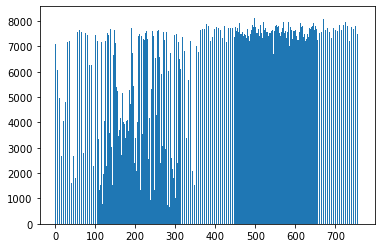

In [11]:
plt.bar(x = np.arange(len(height_array)), height=height_array)

<BarContainer object of 760 artists>

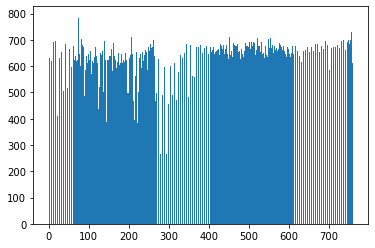

In [12]:
plt.bar(x = np.arange(len(weight_array)), height=weight_array)

Преимущественно все фотографии имеют размеры: height в диапазоне от 7000 до 8000, weight в диапазоне от 600 до 700 (750)  

### Фото в дневном свете

In [13]:
import cv2
root = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML'
root_image = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/photos/'
root_masks = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/'
root_masks_rgb = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels_png/'

weight_array = []
height_array = []
for photo_id in day_for_model:
    img = cv2.imread(root_image + f'{photo_id}.jpeg')
    h, w, c = img.shape
    height_array.append(h)
    weight_array.append(w)

<BarContainer object of 1269 artists>

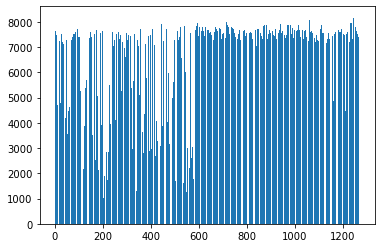

In [14]:
plt.bar(x = np.arange(len(height_array)), height=height_array)

<BarContainer object of 1269 artists>

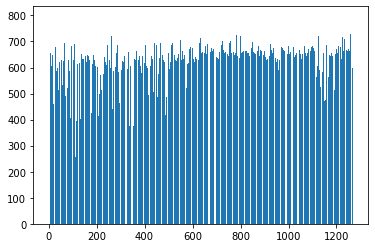

In [15]:
plt.bar(x = np.arange(len(weight_array)), height=weight_array)

Преимущественно все фотографии имеют размеры: height в диапазоне от 7000 до 8000, weight в диапазоне от 600 до 700 (750)  